In [2]:
import pandas as pd
import numpy as np

In [3]:
training_data = pd.read_csv("train.csv")
training_data.head(5)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [4]:
training_data.drop(['pet_id','issue_date','listing_date'],axis=1,inplace=True)
training_data.head(5)

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,1.0,White,0.72,14.19,13,9,0.0,2
2,NaN,Brown,0.15,40.90,15,4,2.0,4
3,1.0,White,0.62,17.82,0,1,0.0,2
4,2.0,Black,0.50,11.06,18,4,0.0,1


In [5]:
training_data.isnull().sum()

condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [6]:
training_data.dropna(subset=['condition'],inplace=True)
training_data.head(5)

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,1.0,White,0.72,14.19,13,9,0.0,2
3,1.0,White,0.62,17.82,0,1,0.0,2
4,2.0,Black,0.50,11.06,18,4,0.0,1
5,0.0,Red,0.92,29.56,0,7,1.0,2


In [7]:
testing_data = pd.read_csv("test.csv")
testing_data.head(5)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [8]:
pet_id = testing_data['pet_id']

In [9]:
testing_data.drop(['pet_id','issue_date','listing_date'],axis=1,inplace=True)
testing_data.head(5)

,condition,color_type,length(m),height(cm),X1,X2
0,0.0,Black,0.87,42.73,0,7
1,1.0,Orange Tabby,0.06,6.71,0,1
2,1.0,Black,0.24,41.21,0,7
3,1.0,Black,0.29,8.46,7,1
4,1.0,Brown,0.71,30.92,0,7


In [10]:
testing_data.isnull().sum()

condition     619
color_type      0
length(m)       0
height(cm)      0
X1              0
X2              0
dtype: int64

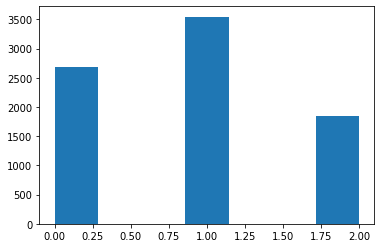

In [54]:
import matplotlib.pyplot as plt
plt.hist(testing_data['condition'], bins = 7)
plt.show()

In [12]:
testing_data['condition'].fillna(testing_data['condition'].median(),inplace = True)

In [13]:
testing_data.isnull().sum()

condition     0
color_type    0
length(m)     0
height(cm)    0
X1            0
X2            0
dtype: int64

In [14]:
training_data = training_data.append(testing_data, sort = False, ignore_index=True) 

In [15]:
training_data

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1.0
1,1.0,White,0.72,14.19,13,9,0.0,2.0
2,1.0,White,0.62,17.82,0,1,0.0,2.0
3,2.0,Black,0.50,11.06,18,4,0.0,1.0
4,0.0,Red,0.92,29.56,0,7,1.0,2.0
...,...,...,...,...,...,...,...,...
25424,2.0,Brown,0.82,36.08,13,9,NaN,NaN
25425,0.0,Tan,0.49,27.54,13,9,NaN,NaN
25426,0.0,Black,0.98,37.19,0,7,NaN,NaN
25427,1.0,Black,0.79,23.83,0,2,NaN,NaN


In [16]:
print(pd.value_counts(training_data.color_type))

Black                6252
White                3403
Brown Tabby          2266
Brown                2160
Tan                  1920
Blue                 1199
Orange Tabby         1058
Brown Brindle         715
Red                   694
Tricolor              656
Blue Tabby            530
Tortie                490
Calico                478
Chocolate             388
Torbie                326
Gray                  306
Cream Tabby           244
Cream                 233
Sable                 225
Fawn                  213
Yellow                202
Buff                  180
Lynx Point            167
Blue Merle            133
Seal Point            112
Black Brindle          92
Gray Tabby             82
Black Tabby            72
Flame Point            72
Brown Merle            60
Orange                 45
Blue Tick              41
Black Smoke            40
Gold                   39
Silver                 34
Red Tick               34
Tortie Point           33
Silver Tabby           25
Red Merle   

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
training_data['color_type'] = le.fit_transform(training_data.color_type)

In [18]:
training_data.head(5)

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,18,0.80,7.78,13,9,0.0,1.0
1,1.0,53,0.72,14.19,13,9,0.0,2.0
2,1.0,53,0.62,17.82,0,1,0.0,2.0
3,2.0,2,0.50,11.06,18,4,0.0,1.0
4,0.0,40,0.92,29.56,0,7,1.0,2.0


In [19]:
print(pd.value_counts(training_data.color_type))

2     6252
53    3403
18    2266
15    2160
48    1920
7     1199
38    1058
16     715
40     694
52     656
12     530
50     490
21     478
23     388
49     326
30     306
26     244
25     233
43     225
27     213
54     202
20     180
36     167
9      133
44     112
3       92
31      82
5       72
28      72
17      60
37      45
13      41
4       40
29      39
45      34
42      34
51      33
47      25
41      25
55      23
10      21
33      20
24      17
22      17
1       16
8       15
11      12
14      11
46       7
32       7
0        5
34       4
19       4
39       3
35       2
6        1
Name: color_type, dtype: int64


In [20]:
temp = training_data
temp

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,18,0.80,7.78,13,9,0.0,1.0
1,1.0,53,0.72,14.19,13,9,0.0,2.0
2,1.0,53,0.62,17.82,0,1,0.0,2.0
3,2.0,2,0.50,11.06,18,4,0.0,1.0
4,0.0,40,0.92,29.56,0,7,1.0,2.0
...,...,...,...,...,...,...,...,...
25424,2.0,15,0.82,36.08,13,9,NaN,NaN
25425,0.0,48,0.49,27.54,13,9,NaN,NaN
25426,0.0,2,0.98,37.19,0,7,NaN,NaN
25427,1.0,2,0.79,23.83,0,2,NaN,NaN


In [21]:
training_data = temp.dropna()
training_data

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,18,0.80,7.78,13,9,0.0,1.0
1,1.0,53,0.72,14.19,13,9,0.0,2.0
2,1.0,53,0.62,17.82,0,1,0.0,2.0
3,2.0,2,0.50,11.06,18,4,0.0,1.0
4,0.0,40,0.92,29.56,0,7,1.0,2.0
...,...,...,...,...,...,...,...,...
17352,1.0,26,0.98,33.81,17,9,0.0,1.0
17353,2.0,52,0.44,27.36,0,1,0.0,2.0
17354,0.0,22,0.99,28.13,13,9,1.0,1.0
17355,0.0,48,0.55,44.82,13,9,1.0,2.0


In [22]:
na_free = temp.dropna()
testing_data = temp[~temp.index.isin(na_free.index)]
testing_data

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
17357,0.0,2,0.87,42.73,0,7,NaN,NaN
17358,1.0,38,0.06,6.71,0,1,NaN,NaN
17359,1.0,2,0.24,41.21,0,7,NaN,NaN
17360,1.0,2,0.29,8.46,7,1,NaN,NaN
17361,1.0,15,0.71,30.92,0,7,NaN,NaN
...,...,...,...,...,...,...,...,...
25424,2.0,15,0.82,36.08,13,9,NaN,NaN
25425,0.0,48,0.49,27.54,13,9,NaN,NaN
25426,0.0,2,0.98,37.19,0,7,NaN,NaN
25427,1.0,2,0.79,23.83,0,2,NaN,NaN


In [23]:
import matplotlib.pyplot as plt
def plotFeatures(col_list,title):
    plt.figure(figsize=(10,10))
    i = 0
    for col in col_list:
        if ( col == "breed_category" or col == "pet_category"):
              continue
        i+=1
        plt.subplot(3,2,i)
        plt.plot(training_data[col],training_data['breed_category'],marker='.',linestyle='none')
        plt.title(title % (col)) 
        plt.xlabel(col)
        plt.ylabel("breed_category")
        plt.tight_layout()

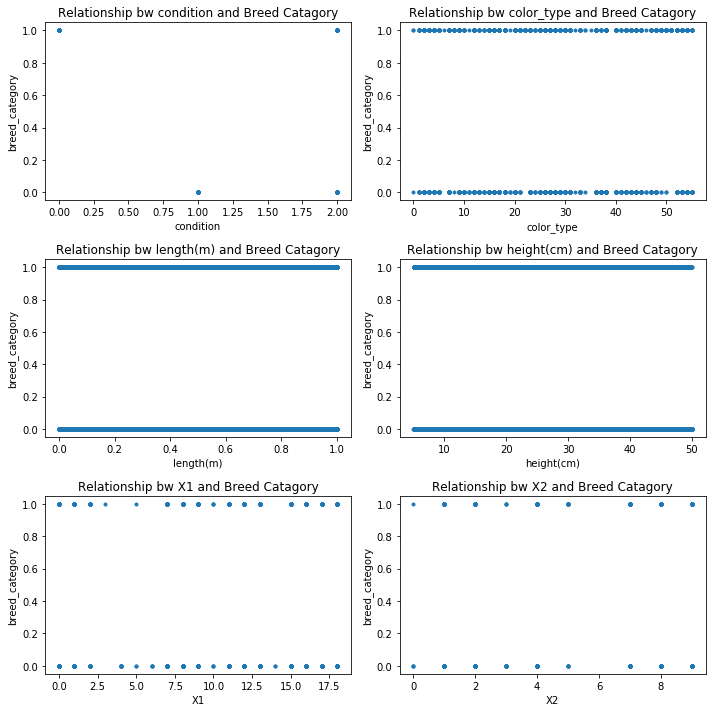

In [24]:
plotFeatures(training_data,"Relationship bw %s and Breed Catagory")

In [25]:
import matplotlib.pyplot as plt
def plotFeatures(col_list,title):
    plt.figure(figsize=(10,10))
    i = 0
    for col in col_list:
        if ( col == "breed_category" or col == "pet_category"):
              continue
        i+=1
        plt.subplot(3,2,i)
        plt.plot(training_data[col],training_data['pet_category'],marker='.',linestyle='none')
        plt.title(title % (col)) 
        plt.xlabel(col)
        plt.ylabel("pet_category")
        plt.tight_layout()

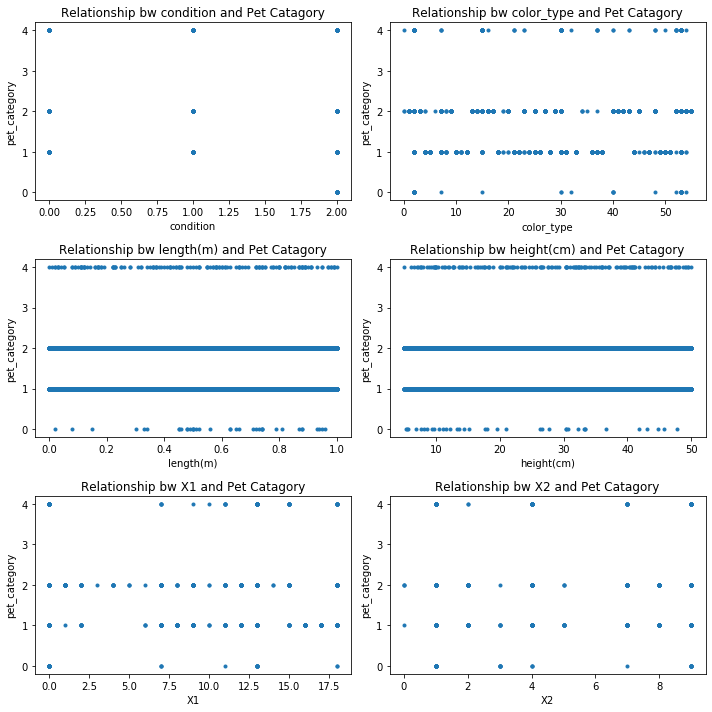

In [26]:
plotFeatures(training_data,"Relationship bw %s and Pet Catagory")

In [27]:
training_data.drop(['height(cm)','X2'],axis=1,inplace=True)
training_data.head(5)

C:\Users\KUSHAL MASTER\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,condition,color_type,length(m),X1,breed_category,pet_category
0,2.0,18,0.80,13,0.0,1.0
1,1.0,53,0.72,13,0.0,2.0
2,1.0,53,0.62,0,0.0,2.0
3,2.0,2,0.50,18,0.0,1.0
4,0.0,40,0.92,0,1.0,2.0


In [28]:
y1 = training_data['breed_category']
y2 = training_data['pet_category']
X = training_data.drop(['breed_category','pet_category'],axis=1) 

In [29]:
X.head(5)

,condition,color_type,length(m),X1
0,2.0,18,0.80,13
1,1.0,53,0.72,13
2,1.0,53,0.62,0
3,2.0,2,0.50,18
4,0.0,40,0.92,0


In [30]:
y1

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
17352    0.0
17353    0.0
17354    1.0
17355    1.0
17356    1.0
Name: breed_category, Length: 17357, dtype: float64

In [31]:
y2

0        1.0
1        2.0
2        2.0
3        1.0
4        2.0
        ... 
17352    1.0
17353    2.0
17354    1.0
17355    2.0
17356    2.0
Name: pet_category, Length: 17357, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.10, random_state=17)

In [33]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(max_depth=5, random_state=0, criterion = 'entropy')

In [34]:
model_1.fit(X_train,y1_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=0)

In [35]:
y1_pred = model_1.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test, y1_pred)

0.8905529953917051

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test, y1_pred)

array([[886,   9],
       [181, 660]], dtype=int64)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.10, random_state=17)

In [39]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(max_depth=5, random_state=0, criterion = 'entropy')

In [40]:
model_2.fit(X_train,y2_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=0)

In [41]:
y2_pred = model_2.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y2_test, y2_pred)

0.8381336405529954

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y2_test, y2_pred)

array([[  0,   0,   5,   0],
       [  0, 490, 147,   0],
       [  0, 111, 965,   0],
       [  0,   6,  12,   0]], dtype=int64)

In [44]:
testing_data.drop(['height(cm)','X2','breed_category','pet_category'],axis=1,inplace=True)
testing_data.head(5)

C:\Users\KUSHAL MASTER\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,condition,color_type,length(m),X1
17357,0.0,2,0.87,0
17358,1.0,38,0.06,0
17359,1.0,2,0.24,0
17360,1.0,2,0.29,7
17361,1.0,15,0.71,0


In [45]:
y1_pred = model_1.predict(testing_data)

In [46]:
print(y1_pred)

[1. 0. 0. ... 1. 0. 1.]


In [47]:
y_pred_1 = []
for i in range(0,len(y1_pred)):
    y_pred_1.append( '%.0f' %  y1_pred[i])

In [48]:
print(y_pred_1)

['1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1',

In [49]:
y2_pred = model_2.predict(testing_data)

In [50]:
print(y2_pred)

[2. 1. 2. ... 2. 2. 2.]


In [51]:
y_pred_2 = []
for i in range(0,len(y2_pred)):
    y_pred_2.append( '%.0f' %  y2_pred[i])

In [52]:
print(y_pred_2)

['2', '1', '2', '1', '2', '1', '2', '2', '1', '2', '1', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '1', '1', '2', '2', '2', '2', '1', '2', '2', '1', '2', '1', '2', '1', '1', '2', '2', '2', '2', '1', '2', '2', '1', '2', '2', '2', '2', '1', '2', '2', '1', '2', '2', '1', '2', '1', '2', '1', '2', '2', '1', '1', '2', '2', '2', '1', '1', '2', '1', '2', '2', '2', '2', '2', '1', '1', '2', '2', '2', '1', '2', '2', '2', '1', '1', '2', '2', '1', '2', '1', '2', '2', '2', '2', '1', '2', '1', '2', '1', '1', '1', '2', '2', '2', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '1', '1', '1', '2', '2', '2', '2', '1', '2', '2', '2', '1', '2', '2', '1', '2', '1', '2', '2', '1', '2', '1', '1', '2', '1', '2', '2', '1', '2', '1', '2', '2', '1', '2', '1', '1', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '1', '2', '2', '2', '2', '1', '1', '2', '2', '1', '2', '2', '1', '2', '2', '1', '2', '1', '2', '2', '2', '1', '2', '2', '1', '2', '1', '2', '2', '2', '2', '1',

In [53]:
pd.DataFrame(list(zip(pet_id,y_pred_1,y_pred_2)),columns=["pet_id","breed_category","pet_category"]).to_csv("submission.csv",index=None)